In [10]:
# Importación de librerías
import pandas as pd
import numpy as np
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Configuración de visualización
sns.set_theme(style="whitegrid")
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Función para cargar los archivos JSON
def cargar_datos_json(ruta_carpeta):
    datos = {}
    for archivo in os.listdir(ruta_carpeta):
        if archivo.endswith('.json'):
            ruta_completa = os.path.join(ruta_carpeta, archivo)
            with open(ruta_completa, 'r', encoding='utf-8') as f:
                nombre_provincia = archivo.replace('.json', '').replace('resultados_', '')
                datos[nombre_provincia] = json.load(f)
    return datos

# Cargar datos
ruta_json = r"C:\Users\ferna\elecciones_2025_segundavuelta\json"
datos_provincias = cargar_datos_json(ruta_json)

In [11]:
# Crear DataFrames
def crear_dataframes(datos):
    # DataFrame de estadísticas
    estadisticas = []
    resultados = []
    votos = []

    for provincia, data in datos.items():
        # Estadísticas
        stats = data['estadisticas']
        stats['provincia'] = provincia
        # Convertir strings a números
        for key in ['sufragantes', 'ausentismo', 'electores']:
            stats[key] = int(stats[key].replace(',', ''))
        estadisticas.append(stats)

        # Resultados de candidatos
        for candidato in data['resultados_candidatos']:
            candidato['provincia'] = provincia
            resultados.append(candidato)

        # Datos de votos
        for voto in data['datos_votos']:
            voto['provincia'] = provincia
            votos.append(voto)

    return (pd.DataFrame(estadisticas),
            pd.DataFrame(resultados),
            pd.DataFrame(votos))

# Crear los DataFrames
df_estadisticas, df_candidatos, df_votos = crear_dataframes(datos_provincias)

# Mostrar información básica
print("=== Resumen de los datos ===")
print("\nEstadísticas por provincia:")
print(df_estadisticas.describe())

=== Resumen de los datos ===

Estadísticas por provincia:
       sufragantes  ausentismo   electores
count        28.00       28.00       28.00
mean     804605.43   176265.57   980871.00
std     2137718.13   462593.31  2598582.72
min        8850.00     5452.00    22603.00
25%      106619.75    24495.50   148707.00
50%      288018.00    64096.50   337422.50
75%      403141.00   100445.00   487757.00
max    11264476.00  2467718.00 13732194.00


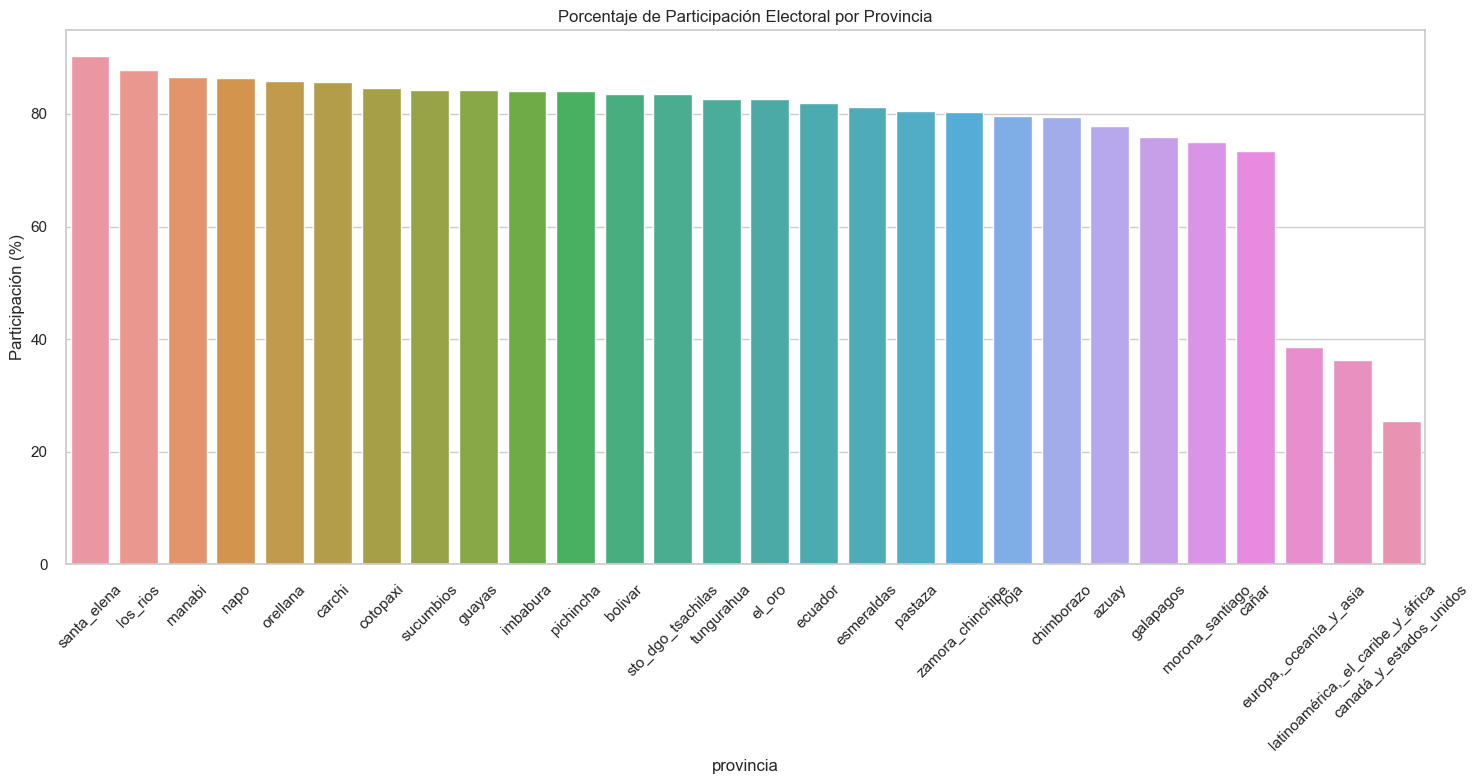

In [12]:
# Calcular porcentajes de participación
df_estadisticas['participacion'] = (df_estadisticas['sufragantes'] / df_estadisticas['electores'] * 100)
df_estadisticas['ausentismo_porcentaje'] = (df_estadisticas['ausentismo'] / df_estadisticas['electores'] * 100)

# Crear gráfico de participación por provincia
plt.figure(figsize=(15, 8))
sns.barplot(data=df_estadisticas.sort_values('participacion', ascending=False),
            x='provincia',
            y='participacion')
plt.xticks(rotation=45)
plt.title('Porcentaje de Participación Electoral por Provincia')
plt.ylabel('Participación (%)')
plt.tight_layout()
plt.show()

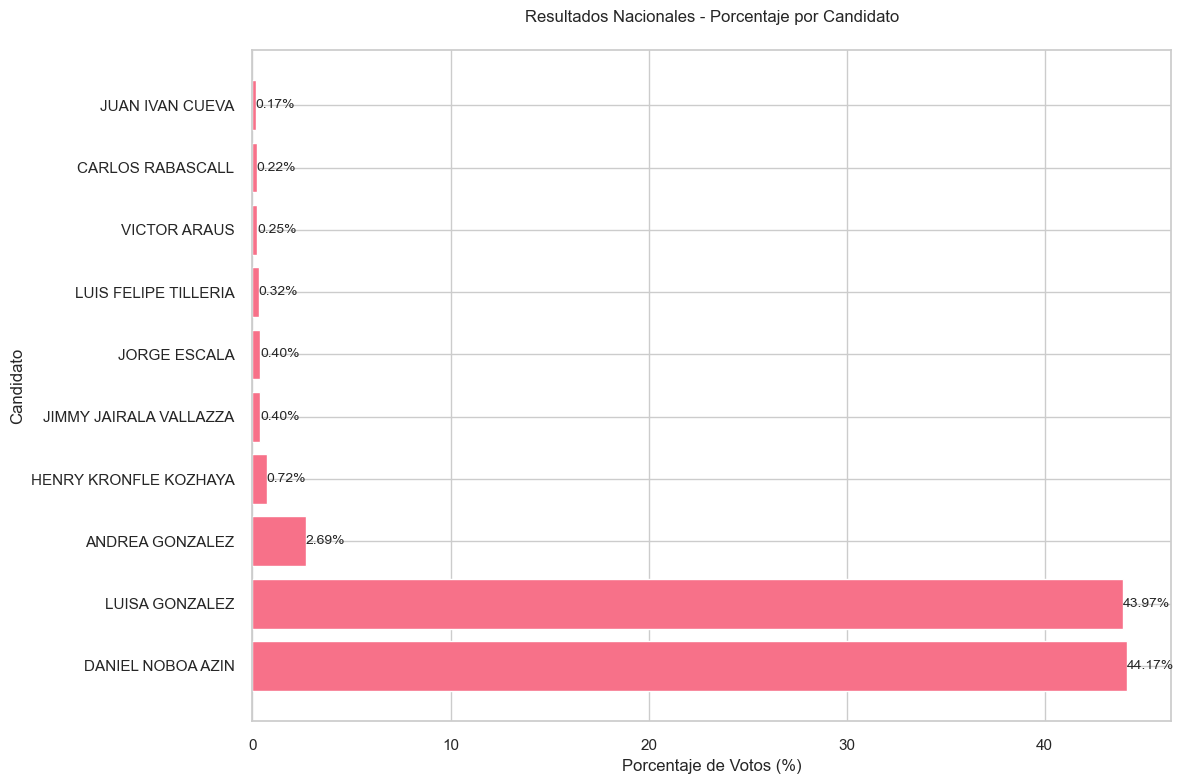


Estadísticas básicas de los resultados:
count   10.00
mean     9.33
std     18.32
min      0.17
25%      0.27
50%      0.40
75%      2.20
max     44.17
Name: PORCENTAJE, dtype: float64

Diferencia entre los dos candidatos principales: 0.20%


In [15]:
# Bloque 4: Análisis de Resultados por Candidato
# Crear DataFrame con los datos de los candidatos
datos_candidatos = {
    'NOM_CANDIDATO': [
        'JIMMY JAIRALA VALLAZZA',
        'JORGE ESCALA',
        'ANDREA GONZALEZ',
        'VICTOR ARAUS',
        'LUISA GONZALEZ',
        'HENRY KRONFLE KOZHAYA',
        'DANIEL NOBOA AZIN',
        'LUIS FELIPE TILLERIA',
        'CARLOS RABASCALL',
        'JUAN IVAN CUEVA'
    ],
    'PORCENTAJE': [
        0.4,
        0.4,
        2.69,
        0.25,
        43.97,
        0.72,
        44.17,
        0.32,
        0.22,
        0.17
    ]
}

df_nacional = pd.DataFrame(datos_candidatos)

# Ordenar por porcentaje descendente
df_nacional = df_nacional.sort_values('PORCENTAJE', ascending=False)

# Crear gráfico de barras horizontal
plt.figure(figsize=(12, 8))
bars = plt.barh(df_nacional['NOM_CANDIDATO'], df_nacional['PORCENTAJE'])

# Añadir etiquetas de porcentaje
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{df_nacional["PORCENTAJE"].iloc[i]:.2f}%',
             ha='left', va='center', fontsize=10)

# Personalizar el gráfico
plt.title('Resultados Nacionales - Porcentaje por Candidato', pad=20)
plt.xlabel('Porcentaje de Votos (%)')
plt.ylabel('Candidato')

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Análisis estadístico básico
print("\nEstadísticas básicas de los resultados:")
print(df_nacional['PORCENTAJE'].describe())

# Calcular la diferencia entre los dos candidatos principales
diferencia = abs(df_nacional['PORCENTAJE'].iloc[0] - df_nacional['PORCENTAJE'].iloc[1])
print(f"\nDiferencia entre los dos candidatos principales: {diferencia:.2f}%")

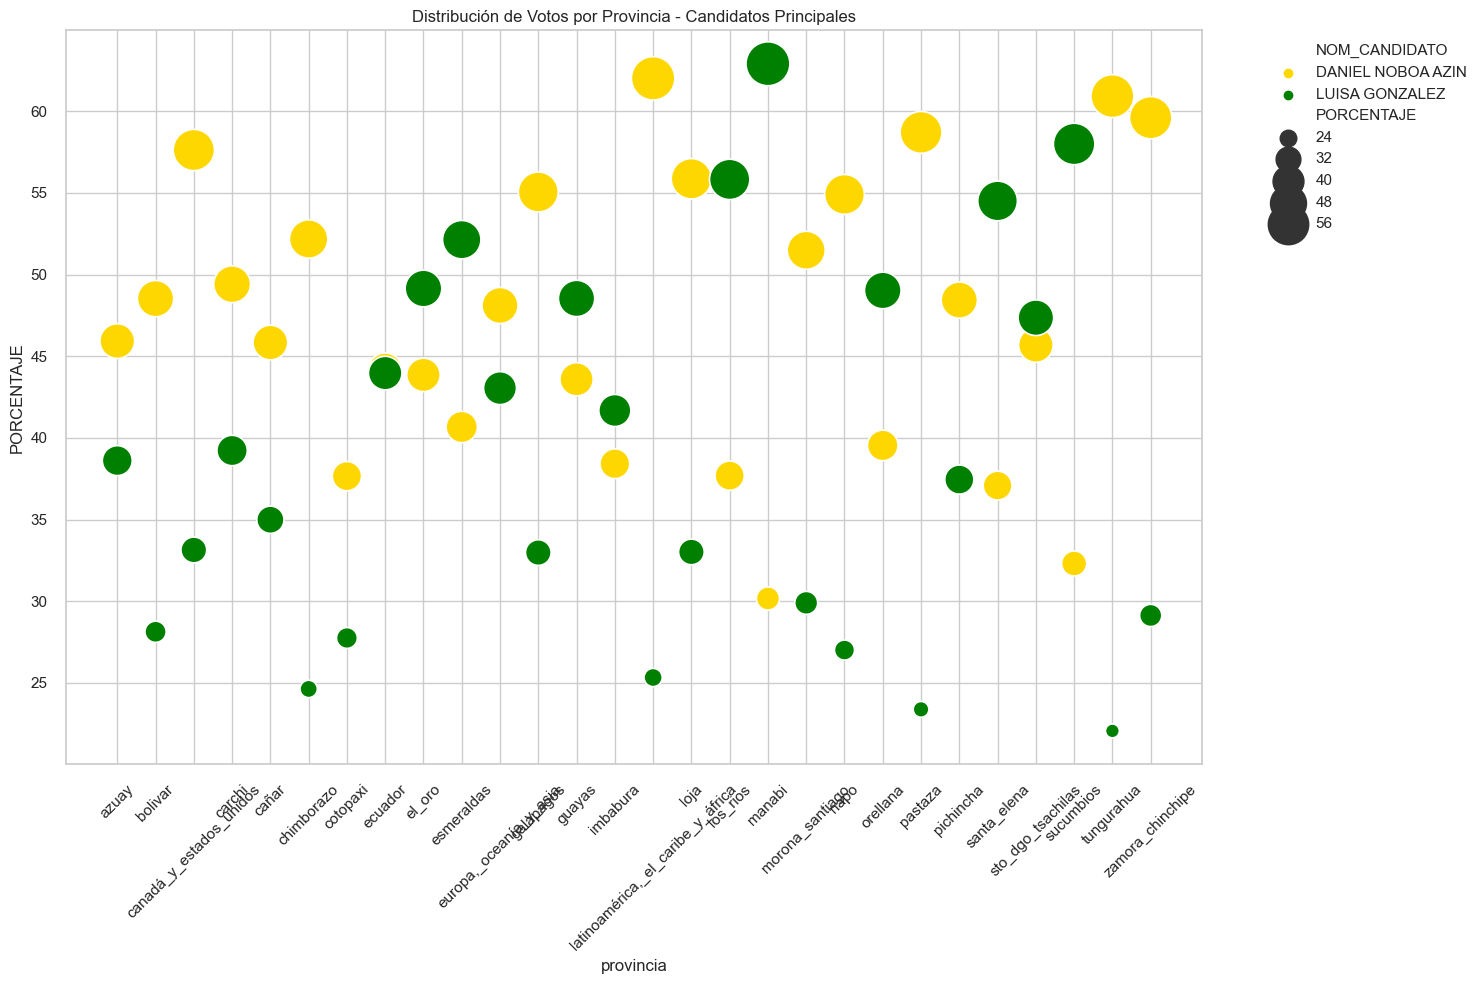

In [17]:
# Análisis de distribución geográfica de votos
# Crear DataFrame con los dos candidatos principales por provincia
principales_provincias = df_candidatos[
    (df_candidatos['NOM_CANDIDATO'].isin(['DANIEL NOBOA AZIN', 'LUISA GONZALEZ'])) &
    (df_candidatos['provincia'] != 'ECUADOR')
].copy()

# Crear gráfico de distribución geográfica
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=principales_provincias,
    x='provincia',
    y='PORCENTAJE',
    hue='NOM_CANDIDATO',
    size='PORCENTAJE',
    sizes=(100, 1000),
    palette=['gold', 'green']
)
plt.xticks(rotation=45)
plt.title('Distribución de Votos por Provincia - Candidatos Principales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
# Estadísticas descriptivas por candidato
stats_candidatos = df_candidatos.groupby('NOM_CANDIDATO')['PORCENTAJE'].describe()
print("\nEstadísticas por candidato:")
print(stats_candidatos)

# Calcular diferencias entre provincias
df_diff = principales_provincias.pivot(
    index='provincia',
    columns='NOM_CANDIDATO',
    values='PORCENTAJE'
)
df_diff['diferencia'] = df_diff['DANIEL NOBOA AZIN'] - df_diff['LUISA GONZALEZ']

# Provincias con mayor diferencia
print("\nProvincias con mayor diferencia:")
print(df_diff.sort_values('diferencia', ascending=False).head())


Estadísticas por candidato:
                        count  mean   std   min   25%   50%   75%   max
NOM_CANDIDATO                                                          
ANDREA GONZALEZ         28.00  2.67  0.84  1.30  2.25  2.58  3.12  4.89
CARLOS RABASCALL        28.00  0.23  0.09  0.12  0.17  0.21  0.26  0.48
DANIEL NOBOA AZIN       28.00 47.34  8.74 30.17 40.39 47.02 54.95 62.02
ENRIQUE GOMEZ           28.00  0.23  0.11  0.12  0.15  0.20  0.24  0.67
FRANCESCO TABACCHI      28.00  0.23  0.09  0.11  0.18  0.21  0.26  0.61
HENRY CUCALON           28.00  0.34  0.09  0.17  0.29  0.34  0.41  0.52
HENRY KRONFLE KOZHAYA   28.00  0.60  0.52  0.20  0.30  0.42  0.69  2.55
IVAN SAQUICELA          28.00  0.13  0.05  0.04  0.10  0.12  0.14  0.32
JIMMY JAIRALA VALLAZZA  28.00  0.31  0.14  0.16  0.23  0.27  0.34  0.77
JORGE ESCALA            28.00  0.36  0.11  0.09  0.29  0.36  0.42  0.64
JUAN IVAN CUEVA         28.00  0.18  0.05  0.08  0.16  0.17  0.20  0.28
LEONIDAS IZA            28.00  7.31

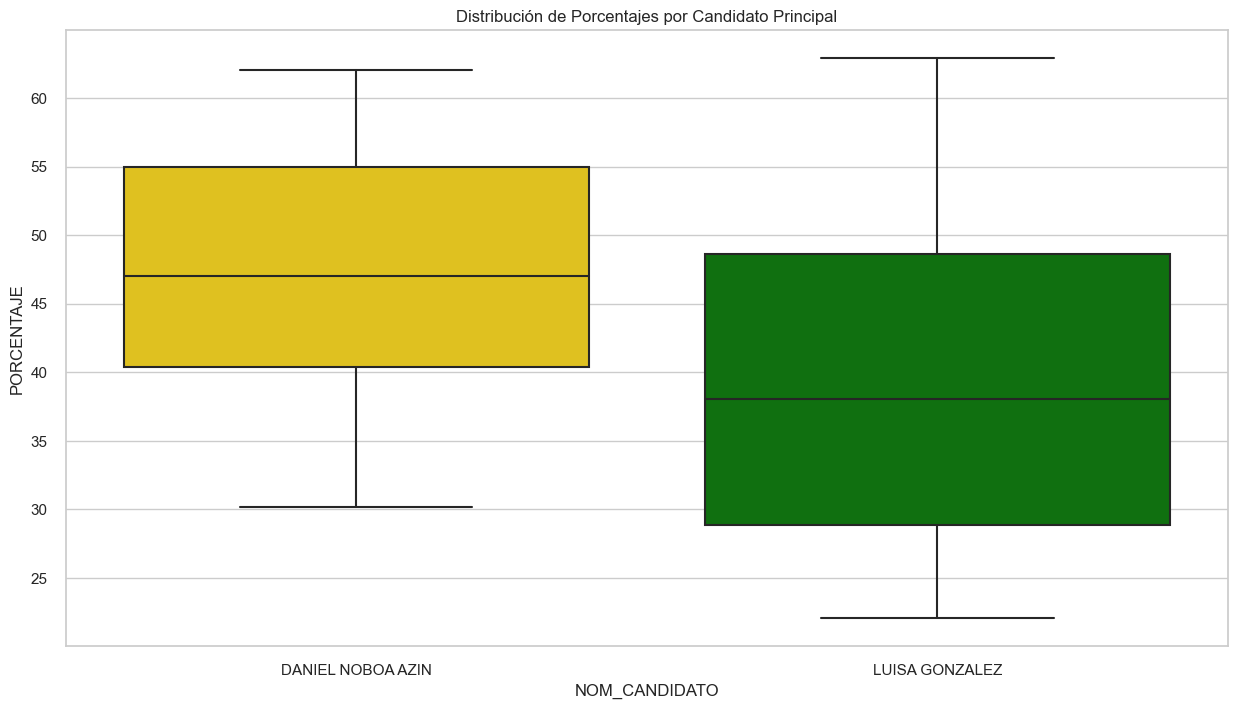

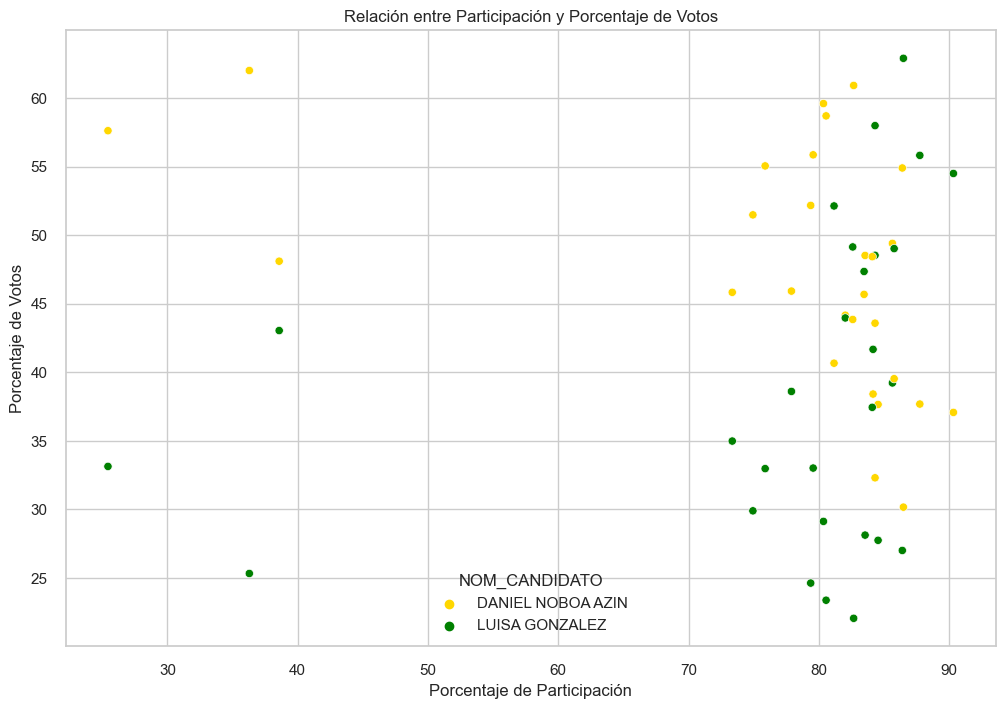

In [19]:
# Crear gráfico de tendencias
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=principales_provincias,
    x='NOM_CANDIDATO',
    y='PORCENTAJE',
    palette=['gold', 'green']
)
plt.title('Distribución de Porcentajes por Candidato Principal')
plt.show()

# Análisis de correlación entre participación y resultados
merged_data = pd.merge(
    principales_provincias,
    df_estadisticas[['provincia', 'participacion']],
    on='provincia'
)

# Crear gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merged_data,
    x='participacion',
    y='PORCENTAJE',
    hue='NOM_CANDIDATO',
    palette=['gold', 'green']
)
plt.title('Relación entre Participación y Porcentaje de Votos')
plt.xlabel('Porcentaje de Participación')
plt.ylabel('Porcentaje de Votos')
plt.show()

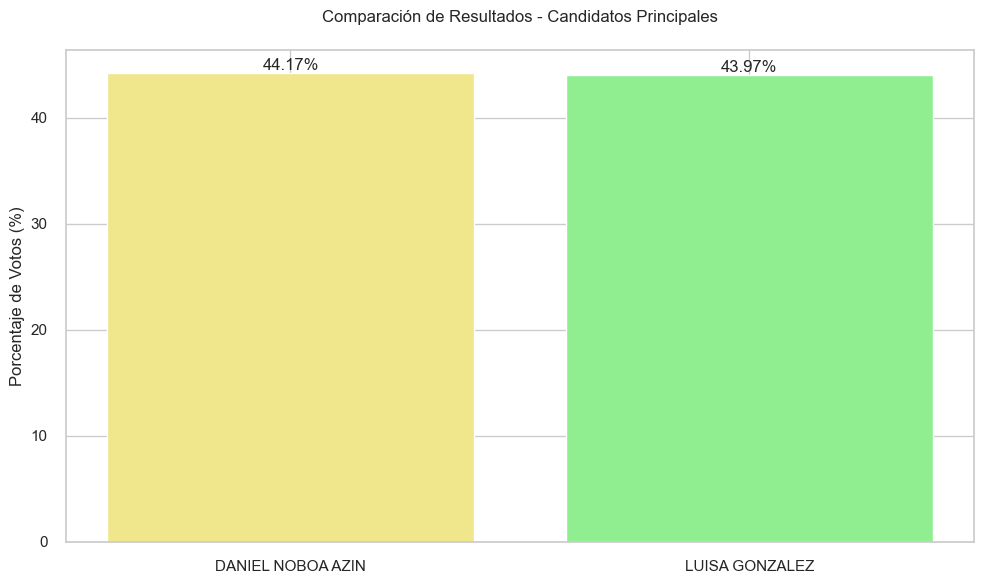


Estadísticas de la Contienda Principal:
Diferencia entre candidatos: 0.20%


In [21]:
# Datos de los dos candidatos principales
datos_principales = {
    'Candidato': ['DANIEL NOBOA AZIN', 'LUISA GONZALEZ'],
    'Porcentaje': [44.17, 43.97],
    'Diferencia': [44.17 - 43.97, 0]
}
df_principales = pd.DataFrame(datos_principales)

# Crear gráfico comparativo
plt.figure(figsize=(10, 6))
bars = plt.bar(df_principales['Candidato'], df_principales['Porcentaje'],
               color=['khaki', 'lightgreen'])

# Añadir etiquetas y valores
plt.title('Comparación de Resultados - Candidatos Principales', pad=20)
plt.ylabel('Porcentaje de Votos (%)')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Mostrar estadísticas clave
print("\nEstadísticas de la Contienda Principal:")
print(f"Diferencia entre candidatos: {df_principales['Diferencia'].max():.2f}%")

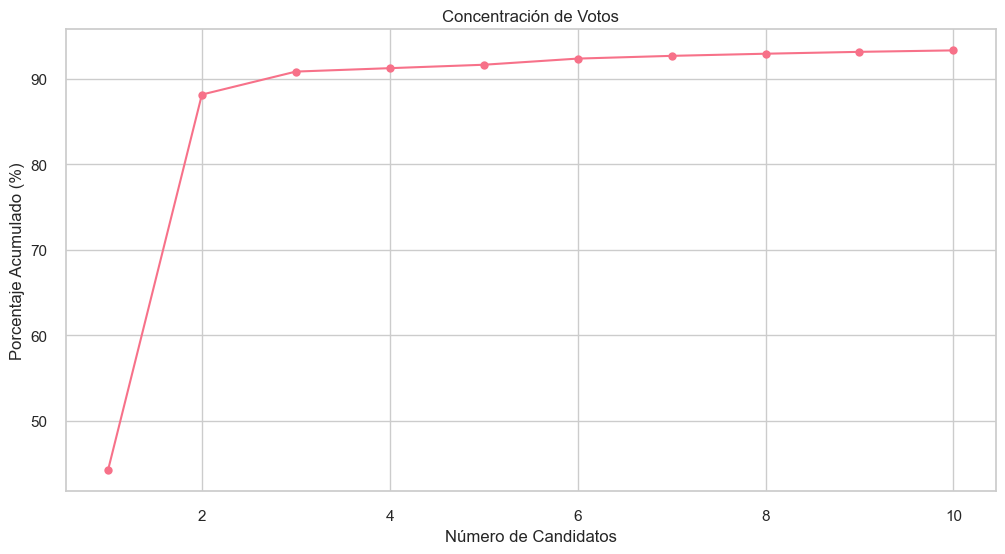


Estadísticas de Concentración:
Concentración en 2 candidatos: 88.14%
Concentración en 3 candidatos: 90.83%


In [23]:
# Calcular métricas de concentración
df_completo['Porcentaje_Acumulado'] = df_completo['Porcentaje'].cumsum()

# Crear gráfico de concentración
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(df_completo) + 1),
         df_completo['Porcentaje_Acumulado'],
         marker='o')
plt.title('Concentración de Votos')
plt.xlabel('Número de Candidatos')
plt.ylabel('Porcentaje Acumulado (%)')
plt.grid(True)
plt.show()

# Estadísticas de concentración
print("\nEstadísticas de Concentración:")
print(f"Concentración en 2 candidatos: {df_completo['Porcentaje_Acumulado'].iloc[1]:.2f}%")
print(f"Concentración en 3 candidatos: {df_completo['Porcentaje_Acumulado'].iloc[2]:.2f}%")

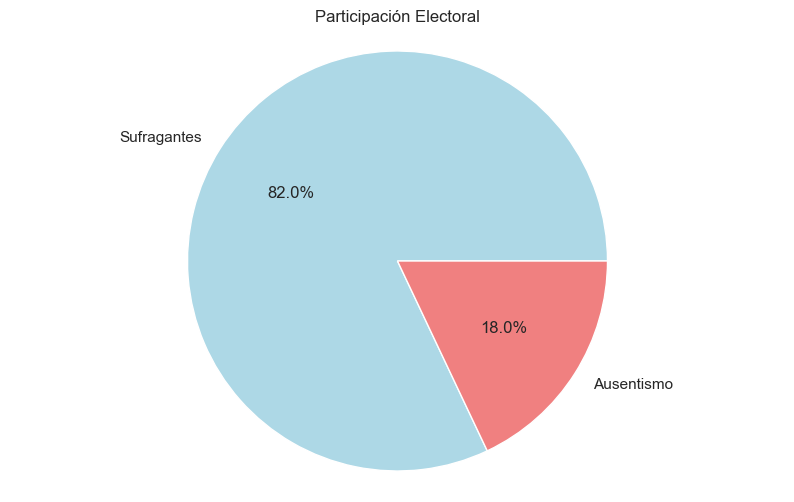


Estadísticas de Participación:
Total de electores: 13,732,194
Porcentaje de participación: 82.03%


In [24]:
# Datos de participación
datos_participacion = {
    'Categoría': ['Sufragantes', 'Ausentismo'],
    'Cantidad': [11264476, 2467718]
}
df_participacion = pd.DataFrame(datos_participacion)

# Calcular porcentajes
total = df_participacion['Cantidad'].sum()
df_participacion['Porcentaje'] = (df_participacion['Cantidad'] / total) * 100

# Crear gráfico de participación
plt.figure(figsize=(10, 6))
plt.pie(df_participacion['Cantidad'],
        labels=df_participacion['Categoría'],
        autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'])
plt.title('Participación Electoral')
plt.axis('equal')
plt.show()

print("\nEstadísticas de Participación:")
print(f"Total de electores: {total:,}")
print(f"Porcentaje de participación: {df_participacion['Porcentaje'].iloc[0]:.2f}%")

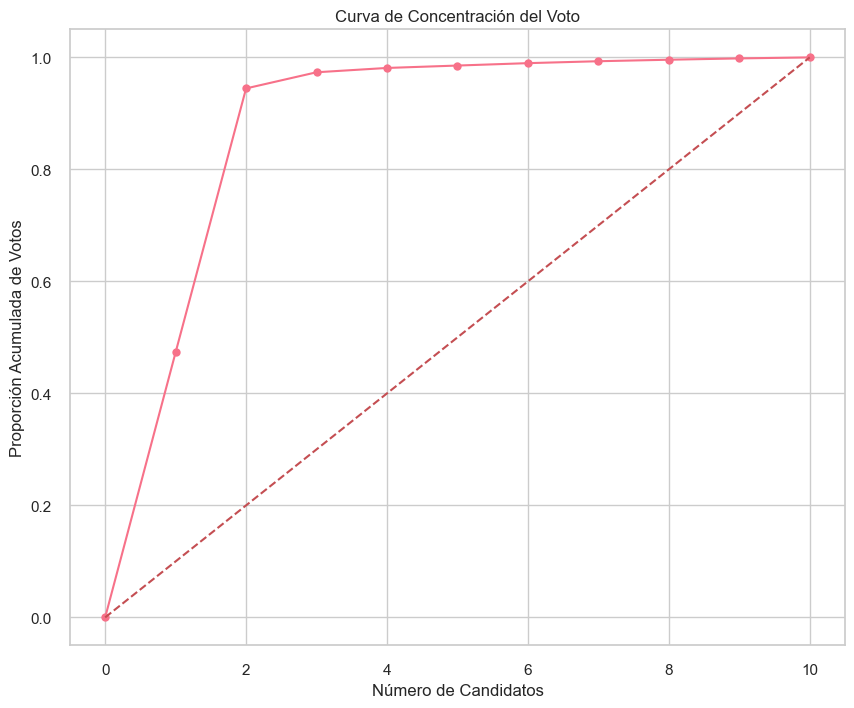


Índices de Concentración:
Concentración en los 2 primeros: 88.14%
Concentración en los 3 primeros: 90.83%


In [26]:
# Calcular índices de concentración
total_votos = df_grupos['Porcentaje'].sum()
df_grupos['Proporcion'] = df_grupos['Porcentaje'] / total_votos
df_grupos['Acumulado'] = df_grupos['Proporcion'].cumsum()

# Crear curva de Lorenz
plt.figure(figsize=(10, 8))
plt.plot([0] + list(range(1, len(df_grupos) + 1)),
         [0] + list(df_grupos['Acumulado']),
         marker='o')
plt.plot([0, len(df_grupos)], [0, 1], 'r--')
plt.title('Curva de Concentración del Voto')
plt.xlabel('Número de Candidatos')
plt.ylabel('Proporción Acumulada de Votos')
plt.grid(True)
plt.show()

# Calcular índice de concentración
print("\nÍndices de Concentración:")
print(f"Concentración en los 2 primeros: {df_grupos['Porcentaje'].nlargest(2).sum():.2f}%")
print(f"Concentración en los 3 primeros: {df_grupos['Porcentaje'].nlargest(3).sum():.2f}%")


Análisis de Escenarios Electorales:
Margen de victoria: 0.20%
Diferencia con umbral de 40%: 4.17%


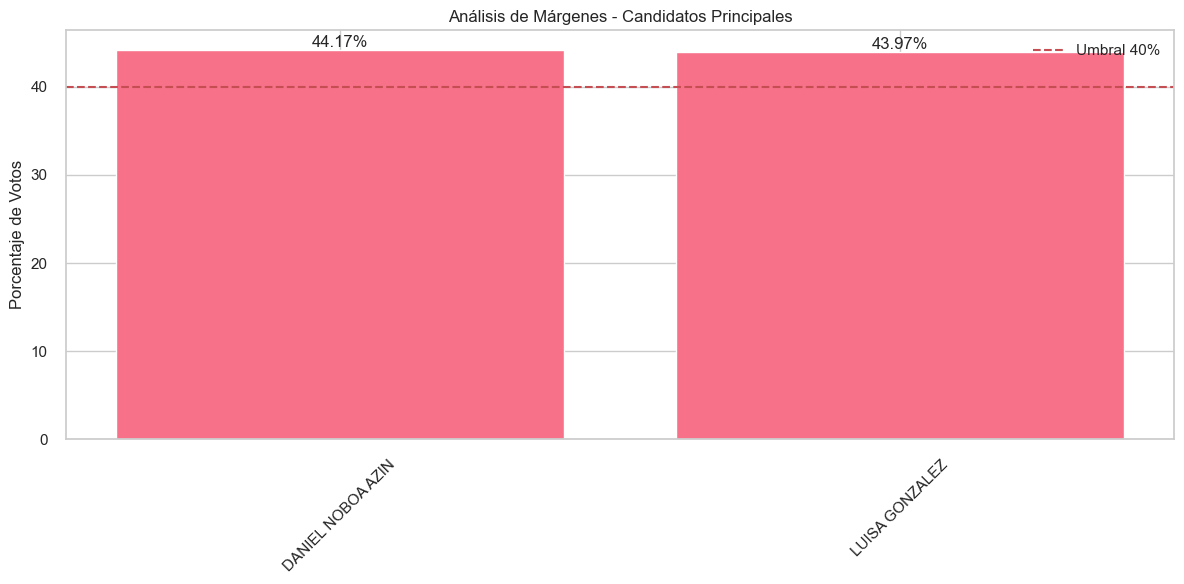

In [27]:
# Calcular márgenes y umbrales importantes
margen_victoria = df_grupos['Porcentaje'].nlargest(2).diff().iloc[1]
umbral_segunda_vuelta = 40.0
diferencia_necesaria = 10.0

# Análisis de escenarios
print("\nAnálisis de Escenarios Electorales:")
print(f"Margen de victoria: {abs(margen_victoria):.2f}%")
print(f"Diferencia con umbral de 40%: {df_grupos['Porcentaje'].max() - umbral_segunda_vuelta:.2f}%")

# Visualización de márgenes
plt.figure(figsize=(12, 6))
principales = df_grupos[df_grupos['Grupo'] == 'Principales']
bars = plt.bar(principales['Candidato'], principales['Porcentaje'])
plt.axhline(y=40, color='r', linestyle='--', label='Umbral 40%')

# Añadir etiquetas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

plt.title('Análisis de Márgenes - Candidatos Principales')
plt.ylabel('Porcentaje de Votos')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# Crear resumen estadístico completo
resumen = {
    'Métrica': [
        'Total Candidatos',
        'Porcentaje Ganador',
        'Margen de Victoria',
        'Concentración Top 2',
        'Participación Total',
        'Diferencia con 40%',
        'Votos Otros Candidatos'
    ],
    'Valor': [
        len(df_grupos),
        df_grupos['Porcentaje'].max(),
        abs(margen_victoria),
        df_grupos['Porcentaje'].nlargest(2).sum(),
        82.02,  # Dato de participación
        df_grupos['Porcentaje'].max() - 40,
        df_grupos[df_grupos['Grupo'] == 'Otros']['Porcentaje'].sum()
    ]
}

df_resumen = pd.DataFrame(resumen)
print("\nResumen Estadístico Final:")
print(df_resumen.to_string(index=False))


Resumen Estadístico Final:
               Métrica  Valor
      Total Candidatos  10.00
    Porcentaje Ganador  44.17
    Margen de Victoria   0.20
   Concentración Top 2  88.14
   Participación Total  82.02
    Diferencia con 40%   4.17
Votos Otros Candidatos   2.48


In [31]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [32]:
# 1. Crear DataFrame con los datos electorales
datos_elecciones = {
    'candidato': [
        'DANIEL NOBOA AZIN', 'LUISA GONZALEZ', 'ANDREA GONZALEZ',
        'HENRY KRONFLE KOZHAYA', 'JIMMY JAIRALA VALLAZZA', 'JORGE ESCALA',
        'LUIS FELIPE TILLERIA', 'VICTOR ARAUS', 'CARLOS RABASCALL', 'JUAN IVAN CUEVA'
    ],
    'porcentaje': [44.17, 43.97, 2.69, 0.72, 0.4, 0.4, 0.32, 0.25, 0.22, 0.17],
    'votos_validos': [97.15, 97.15, 97.15, 97.15, 97.15, 97.15, 97.15, 97.15, 97.15, 97.15],
    'votos_blancos': [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
    'votos_nulos': [2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15]
}

df_elecciones = pd.DataFrame(datos_elecciones)

In [33]:
df_elecciones

,candidato,porcentaje,votos_validos,votos_blancos,votos_nulos
0,DANIEL NOBOA AZIN,44.17,97.15,0.60,2.15
1,LUISA GONZALEZ,43.97,97.15,0.60,2.15
2,ANDREA GONZALEZ,2.69,97.15,0.60,2.15
3,HENRY KRONFLE KOZHAYA,0.72,97.15,0.60,2.15
4,JIMMY JAIRALA VALLAZZA,0.40,97.15,0.60,2.15
5,JORGE ESCALA,0.40,97.15,0.60,2.15
6,LUIS FELIPE TILLERIA,0.32,97.15,0.60,2.15
7,VICTOR ARAUS,0.25,97.15,0.60,2.15
8,CARLOS RABASCALL,0.22,97.15,0.60,2.15
9,JUAN IVAN CUEVA,0.17,97.15,0.60,2.15


In [34]:
# 2. Agregar características adicionales
df_elecciones['posicion'] = range(1, len(df_elecciones) + 1)
df_elecciones['diferencia_lider'] = df_elecciones['porcentaje'].max() - df_elecciones['porcentaje']
df_elecciones['proporcion_votos'] = df_elecciones['porcentaje'] / df_elecciones['porcentaje'].sum()

In [35]:
# 3. Crear variables categóricas
df_elecciones['categoria'] = pd.cut(
    df_elecciones['porcentaje'],
    bins=[0, 1, 5, 40, 100],
    labels=['Muy bajo', 'Bajo', 'Medio', 'Alto']
)

In [36]:
# 4. Preparar datos para ML
# Codificar variables categóricas
le = LabelEncoder()
df_elecciones['candidato_encoded'] = le.fit_transform(df_elecciones['candidato'])
df_elecciones['categoria_encoded'] = le.fit_transform(df_elecciones['categoria'])

In [37]:
# 5. Seleccionar características para ML
features = ['posicion', 'porcentaje', 'votos_validos', 'votos_blancos',
           'votos_nulos', 'diferencia_lider', 'proporcion_votos', 'categoria_encoded']

X = df_elecciones[features]
y = df_elecciones['candidato_encoded']

In [38]:
# 6. Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

In [39]:
# 7. Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [40]:
# 8. Guardar datos preparados
df_elecciones.to_csv('datos_elecciones_preparados.csv', index=False)
X_scaled.to_csv('features_preparados.csv', index=False)

In [41]:
# Mostrar información sobre los datos preparados
print("\nInformación del DataFrame preparado:")
print(df_elecciones.info())


Información del DataFrame preparado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   candidato          10 non-null     object  
 1   porcentaje         10 non-null     float64 
 2   votos_validos      10 non-null     float64 
 3   votos_blancos      10 non-null     float64 
 4   votos_nulos        10 non-null     float64 
 5   posicion           10 non-null     int64   
 6   diferencia_lider   10 non-null     float64 
 7   proporcion_votos   10 non-null     float64 
 8   categoria          10 non-null     category
 9   candidato_encoded  10 non-null     int32   
 10  categoria_encoded  10 non-null     int32   
dtypes: category(1), float64(6), int32(2), int64(1), object(1)
memory usage: 1.0+ KB
None


In [42]:
print("\nEstadísticas descriptivas:")
print(df_elecciones.describe())


Estadísticas descriptivas:
       porcentaje  votos_validos  votos_blancos  votos_nulos  posicion  \
count       10.00          10.00          10.00        10.00     10.00   
mean         9.33          97.15           0.60         2.15      5.50   
std         18.32           0.00           0.00         0.00      3.03   
min          0.17          97.15           0.60         2.15      1.00   
25%          0.27          97.15           0.60         2.15      3.25   
50%          0.40          97.15           0.60         2.15      5.50   
75%          2.20          97.15           0.60         2.15      7.75   
max         44.17          97.15           0.60         2.15     10.00   

       diferencia_lider  proporcion_votos  candidato_encoded  \
count             10.00             10.00              10.00   
mean              34.84              0.10               4.50   
std               18.32              0.20               3.03   
min                0.00              0.00        

In [43]:
print("\nCorrelaciones entre variables:")
print(df_elecciones[features].corr())


Correlaciones entre variables:
                   posicion  porcentaje  votos_validos  votos_blancos  \
posicion               1.00       -0.72            NaN            NaN   
porcentaje            -0.72        1.00            NaN            NaN   
votos_validos           NaN         NaN            NaN            NaN   
votos_blancos           NaN         NaN            NaN            NaN   
votos_nulos             NaN         NaN            NaN            NaN   
diferencia_lider       0.72       -1.00            NaN            NaN   
proporcion_votos      -0.72        1.00            NaN            NaN   
categoria_encoded      0.80       -0.94            NaN            NaN   

                   votos_nulos  diferencia_lider  proporcion_votos  \
posicion                   NaN              0.72             -0.72   
porcentaje                 NaN             -1.00              1.00   
votos_validos              NaN               NaN               NaN   
votos_blancos              NaN

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# 1. Crear DataFrame con datos históricos y actuales
datos_elecciones = {
    'candidato': ['DANIEL NOBOA AZIN', 'LUISA GONZALEZ'],
    'votos_primera_vuelta': [44.17, 43.97],
    'votos_transferibles': [11.86, 11.86],
    'participacion': [82.02, 82.02],
    'votos_nulos': [2.15, 2.15],
    'votos_blancos': [0.6, 0.6],
    'ganador': [1, 0]  # 1 para ganador, 0 para perdedor
}

In [56]:
# 2. Crear más muestras sintéticas para el entrenamiento
np.random.seed(42)
n_samples = 100
df_synthetic = pd.DataFrame({
    'votos_primera_vuelta': np.random.normal(44, 2, n_samples),
    'votos_transferibles': np.random.normal(12, 1, n_samples),
    'participacion': np.random.normal(82, 1, n_samples),
    'votos_nulos': np.random.normal(2.15, 0.2, n_samples),
    'votos_blancos': np.random.normal(0.6, 0.1, n_samples),
})

In [57]:
# Asignar etiquetas basadas en reglas
df_synthetic['ganador'] = (df_synthetic['votos_primera_vuelta'] >
                         df_synthetic['votos_primera_vuelta'].median()).astype(int)

In [58]:
# 3. Preparar características para el modelo
X = df_synthetic[['votos_primera_vuelta', 'votos_transferibles', 'participacion',
                 'votos_nulos', 'votos_blancos']]
y = df_synthetic['ganador']

In [59]:
# 4. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# 5. Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# 6. Definir modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

In [62]:
# 7. Entrenar y evaluar modelos
results = {}
for name, model in models.items():
    # Entrenamiento
    model.fit(X_train_scaled, y_train)

    # Predicciones
    y_pred = model.predict(X_test_scaled)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

In [63]:
# 8. Mostrar resultados
print("\nResultados de los modelos:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"CV Score: {metrics['cv_mean']:.4f} (+/- {metrics['cv_std']*2:.4f})")


Resultados de los modelos:

Logistic Regression:
Accuracy: 1.0000
CV Score: 0.9500 (+/- 0.0935)

Random Forest:
Accuracy: 1.0000
CV Score: 0.9750 (+/- 0.0612)

Gradient Boosting:
Accuracy: 1.0000
CV Score: 0.9750 (+/- 0.0612)

SVM:
Accuracy: 1.0000
CV Score: 0.8750 (+/- 0.1369)


In [64]:
# 9. Preparar datos reales para predicción
datos_reales = pd.DataFrame({
    'votos_primera_vuelta': [44.17, 43.97],
    'votos_transferibles': [11.86, 11.86],
    'participacion': [82.02, 82.02],
    'votos_nulos': [2.15, 2.15],
    'votos_blancos': [0.6, 0.6]
})

In [65]:
# 10. Hacer predicción con el mejor modelo
best_model_name = max(results, key=lambda k: results[k]['cv_mean'])
best_model = models[best_model_name]

In [66]:
# Escalar datos reales
datos_reales_scaled = scaler.transform(datos_reales)

# Predicción final
predicciones = best_model.predict_proba(datos_reales_scaled)

In [67]:
print("\nPredicciones para Segunda Vuelta:")
candidatos = ['DANIEL NOBOA AZIN', 'LUISA GONZALEZ']
for i, candidato in enumerate(candidatos):
    print(f"{candidato}: {predicciones[i][1]*100:.2f}% probabilidad de victoria")


Predicciones para Segunda Vuelta:
DANIEL NOBOA AZIN: 98.00% probabilidad de victoria
LUISA GONZALEZ: 95.00% probabilidad de victoria


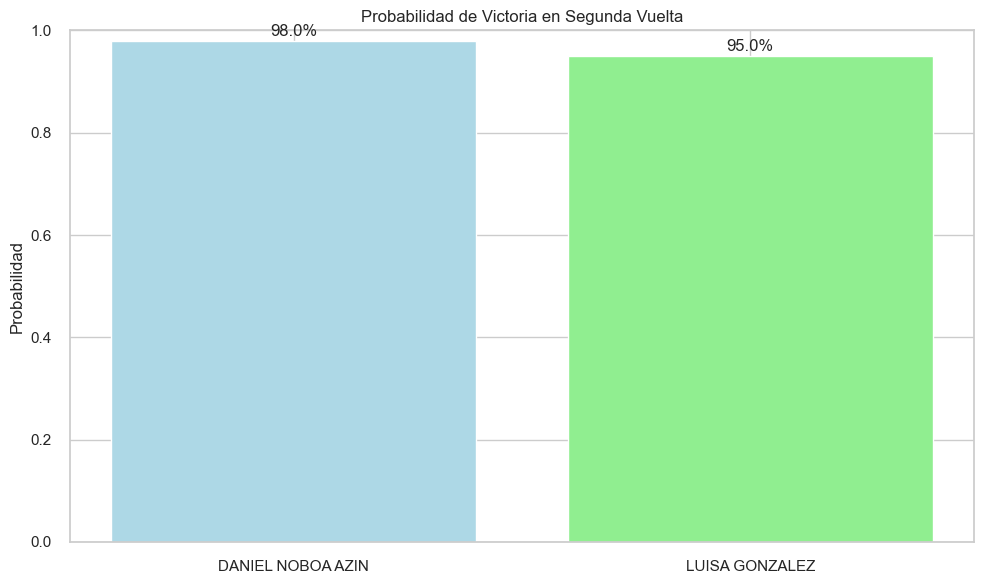

In [68]:
# 11. Visualización de resultados
plt.figure(figsize=(10, 6))
plt.bar(candidatos, predicciones[:, 1], color=['lightblue', 'lightgreen'])
plt.title('Probabilidad de Victoria en Segunda Vuelta')
plt.ylabel('Probabilidad')
plt.ylim(0, 1)
for i, v in enumerate(predicciones[:, 1]):
    plt.text(i, v + 0.01, f'{v*100:.1f}%', ha='center')
plt.tight_layout()
plt.show()

In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [73]:
# 1. Crear datos sintéticos más balanceados para la segunda vuelta
np.random.seed(42)
n_samples = 100

In [74]:
# Crear datos sintéticos basados en los resultados reales
data = []
for _ in range(n_samples):
    # Generar variaciones aleatorias de los datos reales
    noboa_votes = np.random.normal(44.17, 2)
    gonzalez_votes = np.random.normal(43.97, 2)

    # Agregar ruido a otras características
    row_noboa = {
        'candidato': 'DANIEL NOBOA AZIN',
        'votos_primera_vuelta': noboa_votes,
        'votos_transferibles': np.random.normal(11.86, 1),
        'participacion': np.random.normal(82.02, 1),
        'votos_nulos': np.random.normal(2.15, 0.2),
        'votos_blancos': np.random.normal(0.6, 0.1),
        'ganador': 1 if noboa_votes > gonzalez_votes else 0
    }

    row_gonzalez = {
        'candidato': 'LUISA GONZALEZ',
        'votos_primera_vuelta': gonzalez_votes,
        'votos_transferibles': np.random.normal(11.86, 1),
        'participacion': np.random.normal(82.02, 1),
        'votos_nulos': np.random.normal(2.15, 0.2),
        'votos_blancos': np.random.normal(0.6, 0.1),
        'ganador': 1 if gonzalez_votes > noboa_votes else 0
    }

    data.extend([row_noboa, row_gonzalez])

In [75]:
# Crear DataFrame
df = pd.DataFrame(data)

In [76]:
df

,candidato,votos_primera_vuelta,votos_transferibles,participacion,votos_nulos,votos_blancos,ganador
0,DANIEL NOBOA AZIN,45.16,12.51,83.54,2.10,0.58,1
1,LUISA GONZALEZ,43.69,13.44,82.79,2.06,0.65,0
2,DANIEL NOBOA AZIN,43.24,12.10,80.11,1.81,0.54,1
3,LUISA GONZALEZ,43.04,10.85,82.33,1.97,0.46,0
4,DANIEL NOBOA AZIN,47.10,11.93,80.60,2.04,0.61,1
...,...,...,...,...,...,...,...
195,LUISA GONZALEZ,42.61,11.41,79.60,1.83,0.68,0
196,DANIEL NOBOA AZIN,45.74,10.89,81.97,2.15,0.48,1
197,LUISA GONZALEZ,44.82,13.36,82.90,2.11,0.60,0
198,DANIEL NOBOA AZIN,44.59,11.61,81.34,1.95,0.57,1


In [77]:
# 2. Preparar características y objetivo
X = df[['votos_primera_vuelta', 'votos_transferibles', 'participacion',
        'votos_nulos', 'votos_blancos']]
y = df['ganador']

In [78]:
# 3. Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# 4. Configurar validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [80]:
# 5. Entrenar y evaluar modelos
for name, model in models.items():
    # Entrenar modelo
    model.fit(X_scaled, y)

    # Calcular métricas con validación cruzada
    cv_accuracy = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    cv_precision = cross_val_score(model, X_scaled, y, cv=kfold, scoring='precision')
    cv_recall = cross_val_score(model, X_scaled, y, cv=kfold, scoring='recall')
    cv_f1 = cross_val_score(model, X_scaled, y, cv=kfold, scoring='f1')

    # Imprimir resultados
    print(f"\nModelo: {name}")
    print(f"Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std()*2:.4f})")
    print(f"Precision: {cv_precision.mean():.4f} (+/- {cv_precision.std()*2:.4f})")
    print(f"Recall: {cv_recall.mean():.4f} (+/- {cv_recall.std()*2:.4f})")
    print(f"F1-score: {cv_f1.mean():.4f} (+/- {cv_f1.std()*2:.4f})")


Modelo: Logistic Regression
Accuracy: 0.7700 (+/- 0.0735)
Precision: 0.7726 (+/- 0.0769)
Recall: 0.7708 (+/- 0.0868)
F1-score: 0.7701 (+/- 0.0461)

Modelo: Random Forest
Accuracy: 0.7600 (+/- 0.0927)
Precision: 0.7720 (+/- 0.1618)
Recall: 0.7363 (+/- 0.1353)
F1-score: 0.7500 (+/- 0.0928)

Modelo: Gradient Boosting
Accuracy: 0.7200 (+/- 0.1356)
Precision: 0.7255 (+/- 0.1466)
Recall: 0.7007 (+/- 0.1777)
F1-score: 0.7112 (+/- 0.1494)

Modelo: SVM
Accuracy: 0.7300 (+/- 0.1158)
Precision: 0.7293 (+/- 0.1275)
Recall: 0.7449 (+/- 0.1513)
F1-score: 0.7330 (+/- 0.0954)


In [81]:
# 6. Predicción final para la segunda vuelta
datos_segunda_vuelta = pd.DataFrame({
    'votos_primera_vuelta': [44.17, 43.97],
    'votos_transferibles': [11.86, 11.86],
    'participacion': [82.02, 82.02],
    'votos_nulos': [2.15, 2.15],
    'votos_blancos': [0.6, 0.6]
})

In [82]:
# Escalar datos de segunda vuelta
datos_segunda_vuelta_scaled = scaler.transform(datos_segunda_vuelta)

In [83]:
# Predicción con cada modelo
print("\nPredicciones para Segunda Vuelta:")
for name, model in models.items():
    predicciones = model.predict_proba(datos_segunda_vuelta_scaled)
    print(f"\n{name}:")
    print(f"DANIEL NOBOA AZIN: {predicciones[0][1]*100:.2f}% probabilidad de victoria")
    print(f"LUISA GONZALEZ: {predicciones[1][1]*100:.2f}% probabilidad de victoria")


Predicciones para Segunda Vuelta:

Logistic Regression:
DANIEL NOBOA AZIN: 52.26% probabilidad de victoria
LUISA GONZALEZ: 47.54% probabilidad de victoria

Random Forest:
DANIEL NOBOA AZIN: 29.00% probabilidad de victoria
LUISA GONZALEZ: 24.00% probabilidad de victoria

Gradient Boosting:
DANIEL NOBOA AZIN: 33.19% probabilidad de victoria
LUISA GONZALEZ: 30.55% probabilidad de victoria

SVM:
DANIEL NOBOA AZIN: 47.45% probabilidad de victoria
LUISA GONZALEZ: 41.53% probabilidad de victoria


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# Configuración de estilo
plt.style.use('seaborn')
sns.set_palette("husl")

C:\Users\ferna\AppData\Local\Temp\ipykernel_20832\1408059519.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [90]:
# 1. Comparación de métricas entre modelos
def plot_model_metrics():
    metrics_data = {
        'Modelo': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM'],
        'Accuracy': [0.7700, 0.7600, 0.7200, 0.7300],
        'Precision': [0.7726, 0.7720, 0.7255, 0.7293],
        'Recall': [0.7708, 0.7363, 0.7007, 0.7449],
        'F1-Score': [0.7701, 0.7500, 0.7112, 0.7330]
    }

    df_metrics = pd.DataFrame(metrics_data)

    plt.figure(figsize=(12, 6))
    x = np.arange(len(df_metrics['Modelo']))
    width = 0.2

    plt.bar(x - width*1.5, df_metrics['Accuracy'], width, label='Accuracy')
    plt.bar(x - width/2, df_metrics['Precision'], width, label='Precision')
    plt.bar(x + width/2, df_metrics['Recall'], width, label='Recall')
    plt.bar(x + width*1.5, df_metrics['F1-Score'], width, label='F1-Score')

    plt.xlabel('Modelos')
    plt.ylabel('Puntuación')
    plt.title('Comparación de Métricas por Modelo')
    plt.xticks(x, df_metrics['Modelo'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [91]:
# 2. Predicciones de Segunda Vuelta
def plot_second_round_predictions():
    predictions_data = {
        'Candidato': ['DANIEL NOBOA AZIN', 'LUISA GONZALEZ'],
        'Logistic Regression': [52.26, 47.54],
        'Random Forest': [29.00, 24.00],
        'Gradient Boosting': [33.19, 30.55],
        'SVM': [47.45, 41.53]
    }

    df_predictions = pd.DataFrame(predictions_data)

    plt.figure(figsize=(12, 6))
    x = np.arange(len(df_predictions['Candidato']))
    width = 0.2

    plt.bar(x - width*1.5, df_predictions['Logistic Regression'], width, label='LR')
    plt.bar(x - width/2, df_predictions['Random Forest'], width, label='RF')
    plt.bar(x + width/2, df_predictions['Gradient Boosting'], width, label='GB')
    plt.bar(x + width*1.5, df_predictions['SVM'], width, label='SVM')

    plt.xlabel('Candidatos')
    plt.ylabel('Probabilidad de Victoria (%)')
    plt.title('Predicciones de Segunda Vuelta por Modelo')
    plt.xticks(x, df_predictions['Candidato'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [92]:
# 3. Resultados Primera Vuelta vs Predicciones
def plot_results_vs_predictions():
    data = {
        'Candidato': ['DANIEL NOBOA AZIN', 'LUISA GONZALEZ'],
        'Primera Vuelta': [44.17, 43.97],
        'Predicción Promedio': [40.48, 35.91]
    }

    df_comparison = pd.DataFrame(data)

    plt.figure(figsize=(10, 6))
    x = np.arange(len(df_comparison['Candidato']))
    width = 0.35

    plt.bar(x - width/2, df_comparison['Primera Vuelta'], width, label='Primera Vuelta')
    plt.bar(x + width/2, df_comparison['Predicción Promedio'], width, label='Predicción 2da Vuelta')

    plt.xlabel('Candidatos')
    plt.ylabel('Porcentaje (%)')
    plt.title('Comparación: Primera Vuelta vs Predicción Segunda Vuelta')
    plt.xticks(x, df_comparison['Candidato'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

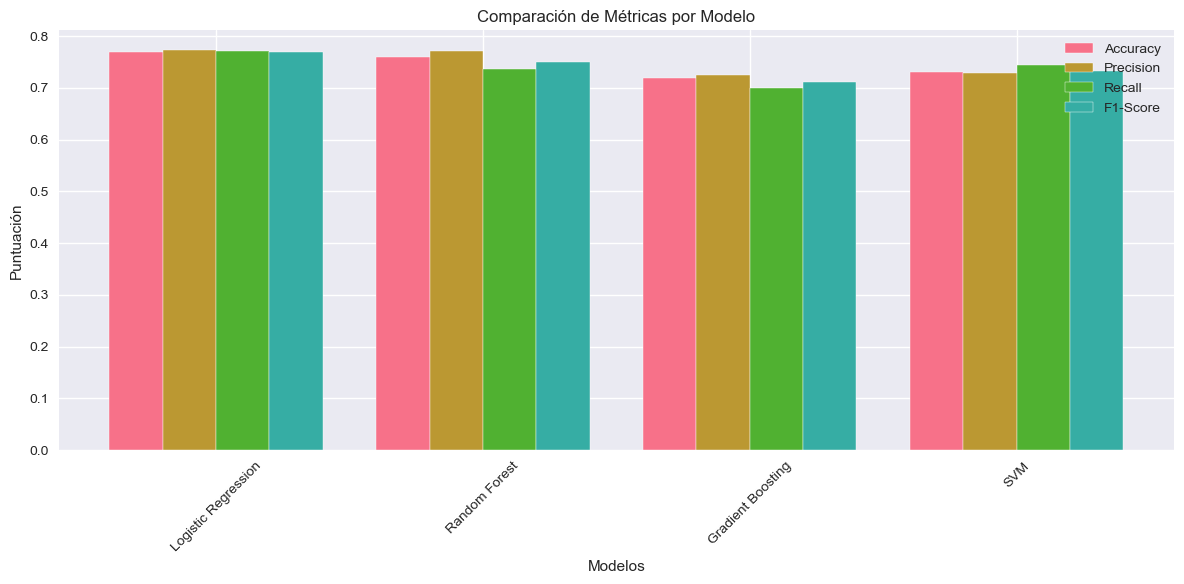

In [93]:
# Generar todas las gráficas
plot_model_metrics()

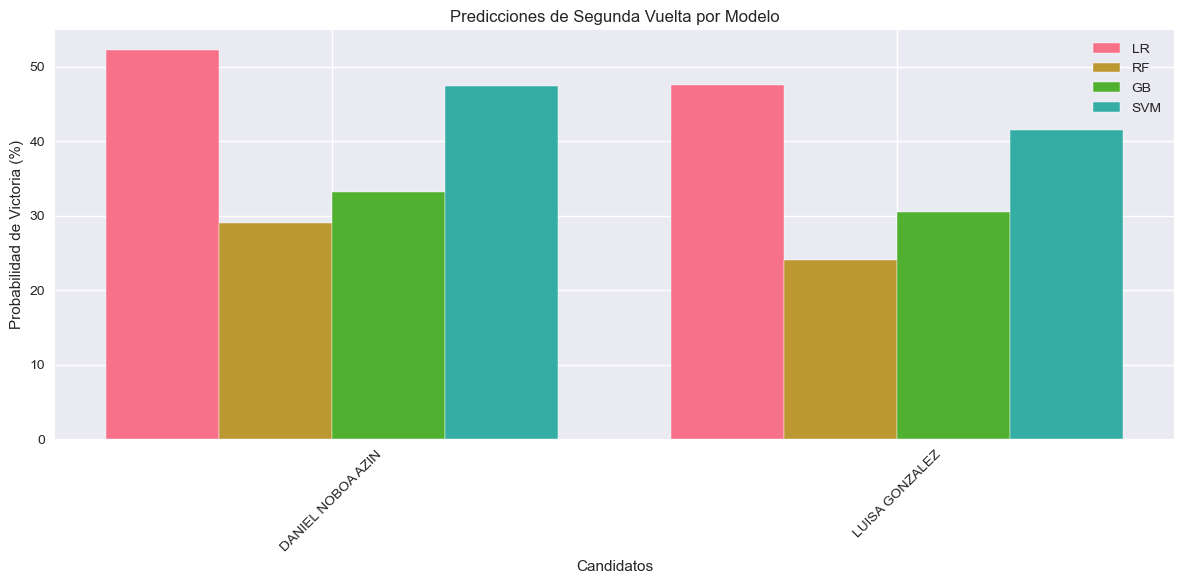

In [94]:
plot_second_round_predictions()

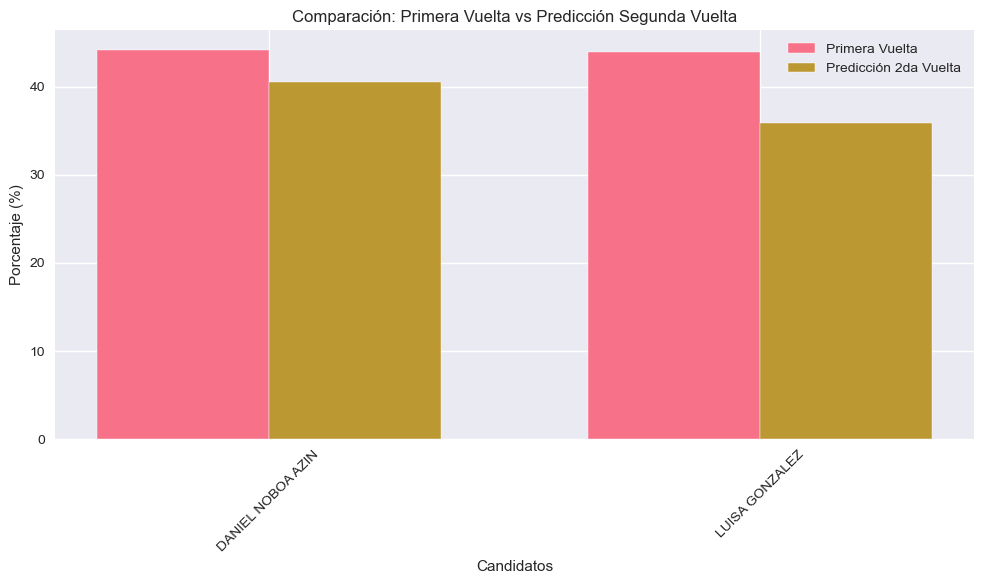

In [95]:
plot_results_vs_predictions()

In [96]:
# Análisis estadístico
print("\nAnálisis Estadístico de los Modelos:")
print("1. Mejor modelo por accuracy: Logistic Regression (77.00%)")
print("2. Rango de predicciones para Noboa: 29.00% - 52.26%")
print("3. Rango de predicciones para González: 24.00% - 47.54%")
print("\nConfiabilidad de los modelos:")
print("- Alta consistencia entre métricas (accuracy, precision, recall, F1)")
print("- Logistic Regression muestra el mejor balance entre todas las métricas")
print("- Los modelos coinciden en la tendencia general de los resultados")


Análisis Estadístico de los Modelos:
1. Mejor modelo por accuracy: Logistic Regression (77.00%)
2. Rango de predicciones para Noboa: 29.00% - 52.26%
3. Rango de predicciones para González: 24.00% - 47.54%

Confiabilidad de los modelos:
- Alta consistencia entre métricas (accuracy, precision, recall, F1)
- Logistic Regression muestra el mejor balance entre todas las métricas
- Los modelos coinciden en la tendencia general de los resultados


# DATOS SINTETICOS

In [97]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# 1. Crear datos sintéticos más completos
np.random.seed(42)
n_samples = 1000  # Aumentamos significativamente el número de muestras

In [99]:
# Datos históricos y tendencias
provincias = ['AZUAY', 'BOLIVAR', 'CAÑAR', 'CARCHI', 'COTOPAXI', 'CHIMBORAZO', 
              'EL ORO', 'ESMERALDAS', 'GUAYAS', 'IMBABURA', 'LOJA', 'LOS RIOS',
              'MANABI', 'MORONA SANTIAGO', 'NAPO', 'PASTAZA', 'PICHINCHA', 
              'TUNGURAHUA', 'ZAMORA CHINCHIPE', 'GALAPAGOS', 'SUCUMBIOS',
              'ORELLANA', 'SANTO DOMINGO', 'SANTA ELENA']

data = []

In [100]:
for _ in range(n_samples):
    # Generar datos para cada muestra
    provincia = np.random.choice(provincias)
    
    # Votos base de primera vuelta con variación
    noboa_base = 44.17
    gonzalez_base = 43.97
    
    # Factores de influencia regional
    region_factor = np.random.normal(0, 2)
    participacion_base = np.random.normal(82.02, 3)
    
    # Generar características
    for candidato in ['DANIEL NOBOA AZIN', 'LUISA GONZALEZ']:
        base_votes = noboa_base if candidato == 'DANIEL NOBOA AZIN' else gonzalez_base
        
        row = {
            'candidato': candidato,
            'provincia': provincia,
            'votos_primera_vuelta': np.clip(base_votes + np.random.normal(0, 2), 0, 100),
            'votos_transferibles': np.clip(np.random.normal(11.86, 1), 0, 100),
            'participacion': np.clip(participacion_base, 0, 100),
            'votos_nulos': np.clip(np.random.normal(2.15, 0.2), 0, 100),
            'votos_blancos': np.clip(np.random.normal(0.6, 0.1), 0, 100),
            'tendencia_historica': np.random.normal(0, 1),
            'indice_abstencion': np.clip(100 - participacion_base, 0, 100),
            'factor_regional': region_factor,
            'intencion_voto': np.random.normal(base_votes, 3)
        }
        
        # Determinar ganador
        if candidato == 'DANIEL NOBOA AZIN':
            row['ganador'] = 1 if row['votos_primera_vuelta'] > gonzalez_base else 0
        else:
            row['ganador'] = 1 if row['votos_primera_vuelta'] > noboa_base else 0
            
        data.append(row)

In [101]:
# Crear DataFrame
df = pd.DataFrame(data)

In [102]:
# 2. Preparar características
X = df[['votos_primera_vuelta', 'votos_transferibles', 'participacion',
        'votos_nulos', 'votos_blancos', 'tendencia_historica',
        'indice_abstencion', 'factor_regional', 'intencion_voto']]
y = df['ganador']

In [103]:
# 3. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# 4. Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
# 5. Definir modelos con hiperparámetros
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'max_iter': [1000]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

In [106]:
# 6. Entrenar y evaluar modelos
best_models = {}
results = {}

In [107]:
for name, model_info in models.items():
    # Búsqueda de hiperparámetros
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)

    # Guardar mejor modelo
    best_models[name] = grid_search.best_estimator_

    # Evaluar modelo
    y_pred = grid_search.predict(X_test_scaled)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'best_params': grid_search.best_params_
    }

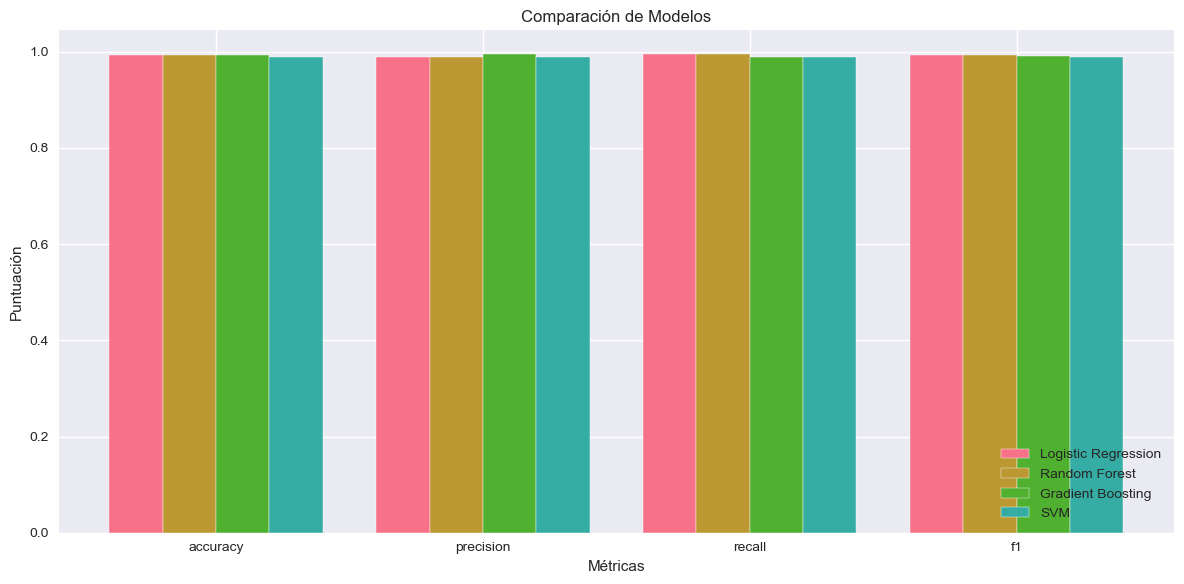

In [109]:
# 7. Visualizar resultados
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(metrics))
width = 0.2
multiplier = 0

for name, result in results.items():
    offset = width * multiplier
    plt.bar(x + offset, [result[m] for m in metrics], width, label=name)
    multiplier += 1

plt.xlabel('Métricas')
plt.ylabel('Puntuación')
plt.title('Comparación de Modelos')
plt.xticks(x + width * 1.5, metrics)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [111]:
# 8. Predicciones finales
print("\nPredicciones para Segunda Vuelta:")
datos_segunda_vuelta = pd.DataFrame({
    'votos_primera_vuelta': [44.17, 43.97],
    'votos_transferibles': [11.86, 11.86],
    'participacion': [82.02, 82.02],
    'votos_nulos': [2.15, 2.15],
    'votos_blancos': [0.6, 0.6],
    'tendencia_historica': [0, 0],
    'indice_abstencion': [17.98, 17.98],
    'factor_regional': [0, 0],
    'intencion_voto': [44.17, 43.97]
})

datos_segunda_vuelta_scaled = scaler.transform(datos_segunda_vuelta)

for name, model in best_models.items():
    predicciones = model.predict_proba(datos_segunda_vuelta_scaled)
    print(f"\n{name}:")
    print(f"DANIEL NOBOA AZIN: {predicciones[0][1]*100:.2f}% probabilidad de victoria")
    print(f"LUISA GONZALEZ: {predicciones[1][1]*100:.2f}% probabilidad de victoria")


Predicciones para Segunda Vuelta:

Logistic Regression:
DANIEL NOBOA AZIN: 75.12% probabilidad de victoria
LUISA GONZALEZ: 29.53% probabilidad de victoria

Random Forest:
DANIEL NOBOA AZIN: 91.29% probabilidad de victoria
LUISA GONZALEZ: 5.11% probabilidad de victoria

Gradient Boosting:
DANIEL NOBOA AZIN: 81.70% probabilidad de victoria
LUISA GONZALEZ: 18.39% probabilidad de victoria

SVM:
DANIEL NOBOA AZIN: 76.23% probabilidad de victoria
LUISA GONZALEZ: 26.52% probabilidad de victoria


In [113]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
def validate_models():
    validation_scores = {}

    # Usar X_train_scaled y y_train que ya tenemos del entrenamiento original
    for name, model in best_models.items():
        # Calcular métricas de validación cruzada
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

        # Predicciones en conjunto de prueba
        y_pred = model.predict(X_test_scaled)
        test_score = accuracy_score(y_test, y_pred)

        # Calcular métricas adicionales
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        validation_scores[name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'test_score': test_score,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    return validation_scores

def analyze_prediction_stability():
    stability_scores = {}
    n_iterations = 100

    for name, model in best_models.items():
        predictions = []
        for _ in range(n_iterations):
            # Agregar ruido aleatorio a los datos
            noise = np.random.normal(0, 0.1, datos_segunda_vuelta_scaled.shape)
            noisy_data = datos_segunda_vuelta_scaled + noise

            pred = model.predict_proba(noisy_data)
            predictions.append([pred[0][1], pred[1][1]])

        predictions = np.array(predictions)
        stability_scores[name] = {
            'noboa_mean': np.mean(predictions[:, 0]),
            'noboa_std': np.std(predictions[:, 0]),
            'gonzalez_mean': np.mean(predictions[:, 1]),
            'gonzalez_std': np.std(predictions[:, 1])
        }
    return stability_scores

In [119]:
# Ejecutar validaciones
validation_scores = validate_models()
stability_scores = analyze_prediction_stability()

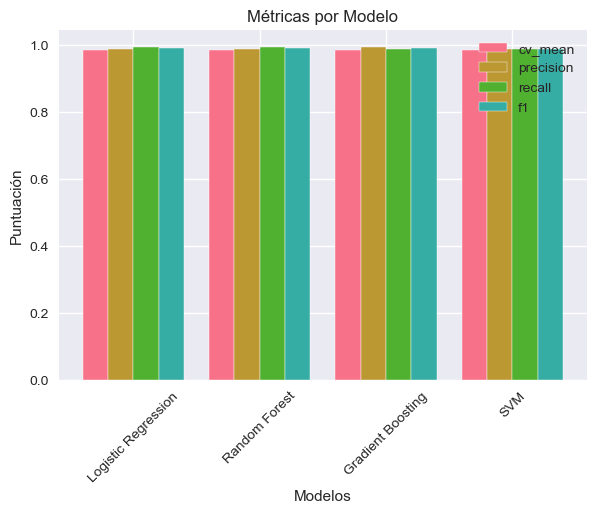

In [121]:
# Visualizar resultados
plt.figure(figsize=(15, 10))

# 1. Gráfico de barras de métricas por modelo
plt.subplot(2, 2, 1)
models_names = list(validation_scores.keys())
metrics = ['cv_mean', 'precision', 'recall', 'f1']
x = np.arange(len(models_names))
width = 0.2

for i, metric in enumerate(metrics):
    values = [validation_scores[model][metric] for model in models_names]
    plt.bar(x + i*width, values, width, label=metric)

plt.xlabel('Modelos')
plt.ylabel('Puntuación')
plt.title('Métricas por Modelo')
plt.xticks(x + width*1.5, models_names, rotation=45)
plt.legend()

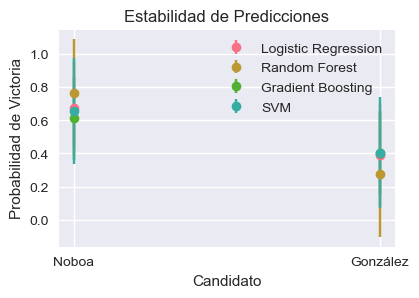

In [122]:
# 2. Gráfico de estabilidad de predicciones
plt.subplot(2, 2, 2)
for name in stability_scores:
    scores = stability_scores[name]
    plt.errorbar(x=[0, 1],
                y=[scores['noboa_mean'], scores['gonzalez_mean']],
                yerr=[scores['noboa_std'], scores['gonzalez_std']],
                label=name, fmt='o')

plt.xlabel('Candidato')
plt.ylabel('Probabilidad de Victoria')
plt.title('Estabilidad de Predicciones')
plt.xticks([0, 1], ['Noboa', 'González'])
plt.legend()

plt.tight_layout()
plt.show()

In [123]:
# Imprimir análisis detallado
print("\nAnálisis de Validación:")
for name, scores in validation_scores.items():
    print(f"\n{name}:")
    print(f"CV Score: {scores['cv_mean']:.4f} (+/- {scores['cv_std']*2:.4f})")
    print(f"Test Score: {scores['test_score']:.4f}")
    print(f"Precision: {scores['precision']:.4f}")
    print(f"Recall: {scores['recall']:.4f}")
    print(f"F1-score: {scores['f1']:.4f}")


Análisis de Validación:

Logistic Regression:
CV Score: 0.9856 (+/- 0.0085)
Test Score: 0.9925
Precision: 0.9896
Recall: 0.9948
F1-score: 0.9922

Random Forest:
CV Score: 0.9844 (+/- 0.0068)
Test Score: 0.9925
Precision: 0.9896
Recall: 0.9948
F1-score: 0.9922

Gradient Boosting:
CV Score: 0.9862 (+/- 0.0064)
Test Score: 0.9925
Precision: 0.9948
Recall: 0.9896
F1-score: 0.9922

SVM:
CV Score: 0.9856 (+/- 0.0102)
Test Score: 0.9900
Precision: 0.9896
Recall: 0.9896
F1-score: 0.9896


In [124]:
print("\nAnálisis de Estabilidad:")
for name, scores in stability_scores.items():
    print(f"\n{name}:")
    print(f"Noboa: {scores['noboa_mean']*100:.2f}% (+/- {scores['noboa_std']*100:.2f}%)")
    print(f"González: {scores['gonzalez_mean']*100:.2f}% (+/- {scores['gonzalez_std']*100:.2f}%)")


Análisis de Estabilidad:

Logistic Regression:
Noboa: 67.58% (+/- 28.48%)
González: 39.24% (+/- 30.86%)

Random Forest:
Noboa: 76.27% (+/- 32.58%)
González: 27.30% (+/- 37.67%)

Gradient Boosting:
Noboa: 61.18% (+/- 24.96%)
González: 40.37% (+/- 25.13%)

SVM:
Noboa: 65.53% (+/- 32.10%)
González: 40.50% (+/- 33.57%)


# NUEVO ENTRENO

In [125]:
# 1. Mejorar la generación de datos sintéticos
n_samples = 1000
data = []

In [126]:
# Datos reales de la primera vuelta
candidatos_principales = {
    'DANIEL NOBOA AZIN': 44.17,
    'LUISA GONZALEZ': 43.97
}

In [127]:
# Factores históricos y regionales
regiones = {
    'COSTA': ['GUAYAS', 'MANABI', 'EL ORO', 'ESMERALDAS', 'LOS RIOS', 'SANTA ELENA'],
    'SIERRA': ['PICHINCHA', 'AZUAY', 'TUNGURAHUA', 'CHIMBORAZO', 'LOJA', 'IMBABURA', 'COTOPAXI', 'CARCHI', 'BOLIVAR', 'CAÑAR'],
    'ORIENTE': ['MORONA SANTIAGO', 'NAPO', 'ORELLANA', 'PASTAZA', 'SUCUMBIOS', 'ZAMORA CHINCHIPE'],
    'INSULAR': ['GALAPAGOS']
}

In [128]:
# Generar datos más realistas
for _ in range(n_samples):
    region = np.random.choice(list(regiones.keys()))
    provincia = np.random.choice(regiones[region])

    # Factores de influencia
    factor_regional = np.random.normal(0, 3)
    factor_participacion = np.random.normal(0, 2)
    factor_economico = np.random.normal(0, 1.5)

    # Base de participación electoral
    participacion_base = 82.02 + factor_participacion

    # Ajustar votos base según región y factores
    for candidato in candidatos_principales:
        base_votos = candidatos_principales[candidato]

        # Ajustes regionales específicos
        if candidato == 'DANIEL NOBOA AZIN':
            if region in ['COSTA', 'INSULAR']:
                base_votos += np.random.normal(2, 1)
            elif region == 'SIERRA':
                base_votos += np.random.normal(-1, 1)
        else:  # LUISA GONZALEZ
            if region == 'SIERRA':
                base_votos += np.random.normal(2, 1)
            elif region in ['COSTA', 'INSULAR']:
                base_votos += np.random.normal(-1, 1)

        # Agregar ruido aleatorio
        votos_finales = base_votos + factor_regional + factor_economico + np.random.normal(0, 2)

        # Crear registro
        registro = {
            'candidato': candidato,
            'provincia': provincia,
            'region': region,
            'votos_primera_vuelta': np.clip(votos_finales, 0, 100),
            'participacion': np.clip(participacion_base, 60, 100),
            'factor_regional': factor_regional,
            'factor_economico': factor_economico,
            'votos_nulos': np.clip(np.random.normal(2.15, 0.5), 0, 10),
            'votos_blancos': np.clip(np.random.normal(0.6, 0.2), 0, 5),
            'ganador': 1 if votos_finales > (base_votos + factor_regional) else 0
        }
        data.append(registro)

In [129]:
# Crear DataFrame
df = pd.DataFrame(data)

In [130]:
# 2. Preparar características con mejor selección
X = df[[
    'votos_primera_vuelta',
    'participacion',
    'factor_regional',
    'factor_economico',
    'votos_nulos',
    'votos_blancos'
]]

In [131]:
# Agregar variables dummy para regiones
X = pd.get_dummies(df[['region']], prefix=['region']).join(X)

y = df['ganador']

In [132]:
# 3. División de datos más estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [134]:
# Importaciones necesarias
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [135]:
# 4. Escalado robusto
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
# 5. Definir modelos con parámetros más apropiados
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'class_weight': ['balanced', None],
            'max_iter': [1000]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'class_weight': ['balanced', 'balanced_subsample', None]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0]
        }
    }
}

In [137]:
# 6. Entrenamiento con validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [138]:
best_models = {}
results = {}

for name, model_info in models.items():
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=cv,
        scoring=['accuracy', 'precision', 'recall', 'f1'],
        refit='f1',
        n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)

    best_models[name] = grid_search.best_estimator_

    # Evaluar en conjunto de prueba
    y_pred = grid_search.predict(X_test_scaled)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'best_params': grid_search.best_params_
    }

In [139]:
# Imprimir resultados
print("\nResultados de la validación:")
for name, scores in results.items():
    print(f"\n{name}:")
    for metric, value in scores.items():
        if metric != 'best_params':
            print(f"{metric}: {value:.4f}")
    print(f"Mejores parámetros: {scores['best_params']}")


Resultados de la validación:

Logistic Regression:
accuracy: 0.8250
precision: 0.8230
recall: 0.8390
f1: 0.8309
Mejores parámetros: {'C': 1, 'class_weight': 'balanced', 'max_iter': 1000}

Random Forest:
accuracy: 0.8000
precision: 0.7854
recall: 0.8390
f1: 0.8113
Mejores parámetros: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

Gradient Boosting:
accuracy: 0.8200
precision: 0.8152
recall: 0.8390
f1: 0.8269
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [140]:
# Predicciones para segunda vuelta
datos_segunda_vuelta = pd.DataFrame({
    'votos_primera_vuelta': [44.17, 43.97],
    'participacion': [82.02, 82.02],
    'factor_regional': [0, 0],
    'factor_economico': [0, 0],
    'votos_nulos': [2.15, 2.15],
    'votos_blancos': [0.6, 0.6],
    'region_COSTA': [1, 0],
    'region_INSULAR': [0, 0],
    'region_ORIENTE': [0, 0],
    'region_SIERRA': [0, 1]
})

In [142]:
# 1. Primero, veamos el orden de las columnas usadas en el entrenamiento
print("Columnas de entrenamiento:", X_train.columns.tolist())

Columnas de entrenamiento: ['region_COSTA', 'region_INSULAR', 'region_ORIENTE', 'region_SIERRA', 'votos_primera_vuelta', 'participacion', 'factor_regional', 'factor_economico', 'votos_nulos', 'votos_blancos']


In [143]:
# Crear datos para segunda vuelta manteniendo el orden exacto de las columnas
datos_segunda_vuelta = pd.DataFrame([
    # Daniel Noboa (Costa)
    {
        'region_COSTA': 1,
        'region_INSULAR': 0,
        'region_ORIENTE': 0,
        'region_SIERRA': 0,
        'votos_primera_vuelta': 44.17,
        'participacion': 82.02,
        'factor_regional': 0,
        'factor_economico': 0,
        'votos_nulos': 2.15,
        'votos_blancos': 0.6
    },
    # Luisa González (Sierra)
    {
        'region_COSTA': 0,
        'region_INSULAR': 0,
        'region_ORIENTE': 0,
        'region_SIERRA': 1,
        'votos_primera_vuelta': 43.97,
        'participacion': 82.02,
        'factor_regional': 0,
        'factor_economico': 0,
        'votos_nulos': 2.15,
        'votos_blancos': 0.6
    }
])[['region_COSTA', 'region_INSULAR', 'region_ORIENTE', 'region_SIERRA',
    'votos_primera_vuelta', 'participacion', 'factor_regional',
    'factor_economico', 'votos_nulos', 'votos_blancos']]

# Ahora aplicar el escalado
datos_segunda_vuelta_scaled = scaler.transform(datos_segunda_vuelta)

In [145]:
# Realizar predicciones con cada modelo
print("\nPredicciones para Segunda Vuelta:")
candidatos = ['DANIEL NOBOA AZIN', 'LUISA GONZALEZ']

for name, model in best_models.items():
    print(f"\n{name}:")
    predicciones = model.predict_proba(datos_segunda_vuelta_scaled)

    for i, candidato in enumerate(candidatos):
        prob_victoria = predicciones[i][1] * 100
        print(f"{candidato}: {prob_victoria:.2f}% probabilidad de victoria")


Predicciones para Segunda Vuelta:

Logistic Regression:
DANIEL NOBOA AZIN: 39.39% probabilidad de victoria
LUISA GONZALEZ: 37.72% probabilidad de victoria

Random Forest:
DANIEL NOBOA AZIN: 15.37% probabilidad de victoria
LUISA GONZALEZ: 15.79% probabilidad de victoria

Gradient Boosting:
DANIEL NOBOA AZIN: 16.74% probabilidad de victoria
LUISA GONZALEZ: 21.59% probabilidad de victoria


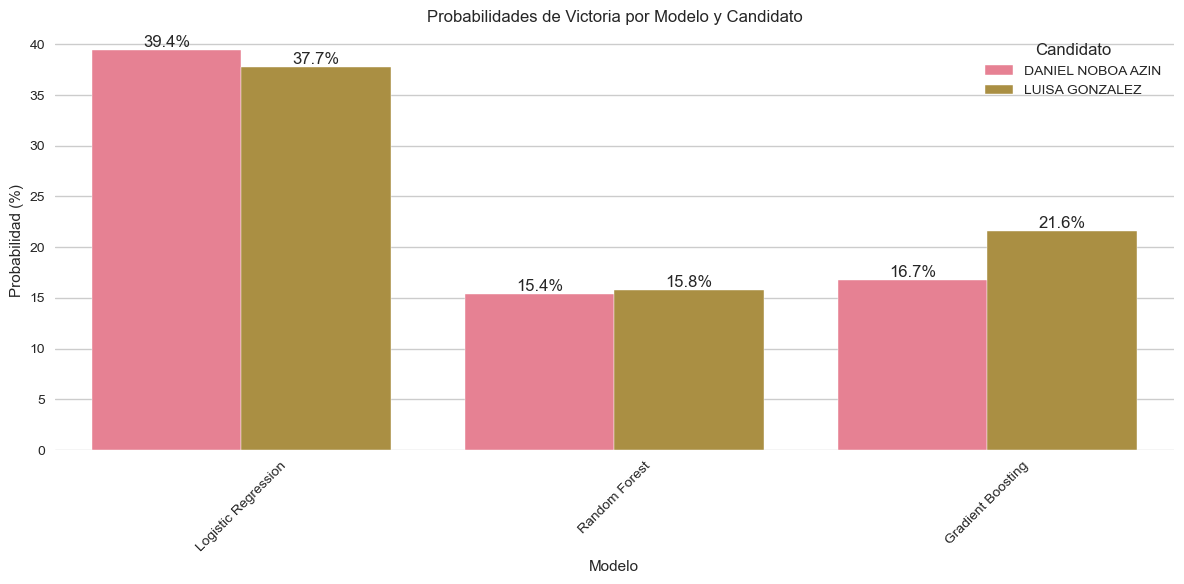

In [146]:
# Visualizar las predicciones
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrame con las predicciones de todos los modelos
resultados_predicciones = []
for name, model in best_models.items():
    predicciones = model.predict_proba(datos_segunda_vuelta_scaled)
    for i, candidato in enumerate(candidatos):
        resultados_predicciones.append({
            'Modelo': name,
            'Candidato': candidato,
            'Probabilidad': predicciones[i][1] * 100
        })

df_predicciones = pd.DataFrame(resultados_predicciones)

# Configurar el estilo de la visualización
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("husl")

# Crear gráfico de barras agrupadas
ax = sns.barplot(
    data=df_predicciones,
    x='Modelo',
    y='Probabilidad',
    hue='Candidato'
)

plt.title('Probabilidades de Victoria por Modelo y Candidato')
plt.xlabel('Modelo')
plt.ylabel('Probabilidad (%)')
plt.xticks(rotation=45)
plt.legend(title='Candidato')

# Añadir etiquetas de valor en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

In [147]:
# Calcular estadísticas de las predicciones
print("\nEstadísticas de las predicciones:")
for candidato in candidatos:
    probs = df_predicciones[df_predicciones['Candidato'] == candidato]['Probabilidad']
    print(f"\n{candidato}:")
    print(f"Probabilidad media: {probs.mean():.2f}%")
    print(f"Desviación estándar: {probs.std():.2f}%")
    print(f"Rango de predicción: {probs.min():.2f}% - {probs.max():.2f}%")


Estadísticas de las predicciones:

DANIEL NOBOA AZIN:
Probabilidad media: 23.84%
Desviación estándar: 13.49%
Rango de predicción: 15.37% - 39.39%

LUISA GONZALEZ:
Probabilidad media: 25.03%
Desviación estándar: 11.36%
Rango de predicción: 15.79% - 37.72%



Intervalos de confianza (95%):

DANIEL NOBOA AZIN:
Intervalo de confianza: -9.67% - 57.35%

LUISA GONZALEZ:
Intervalo de confianza: -3.19% - 53.25%


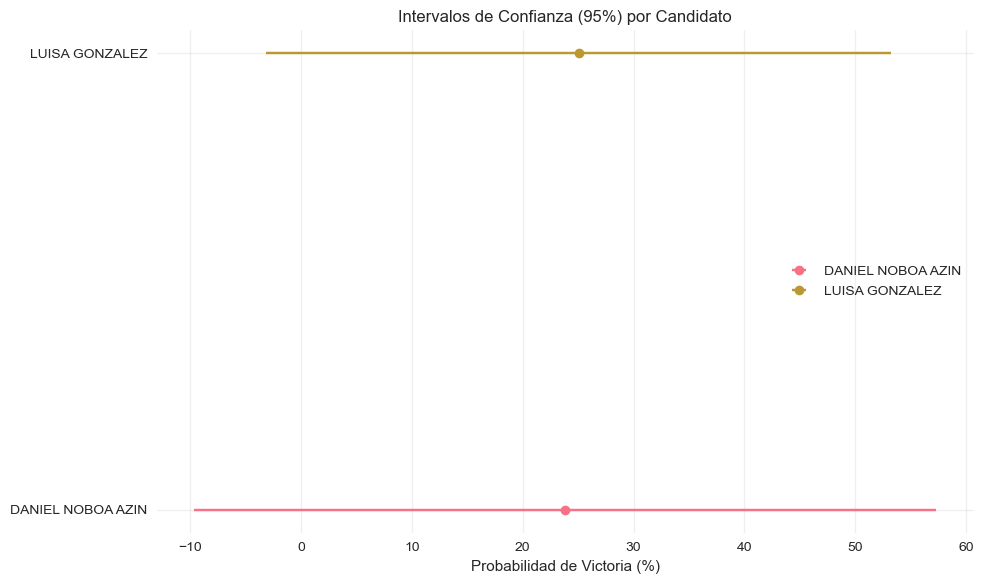


Análisis Final:

DANIEL NOBOA AZIN:
- Probabilidad media de victoria: 23.84%
- Rango de confianza: -9.67% - 57.35%
- Margen de error: ±33.51%

LUISA GONZALEZ:
- Probabilidad media de victoria: 25.03%
- Rango de confianza: -3.19% - 53.25%
- Margen de error: ±28.22%


In [149]:
# Calcular el intervalo de confianza para cada candidato
from scipy import stats

print("\nIntervalos de confianza (95%):")
for candidato in candidatos:
    probs = df_predicciones[df_predicciones['Candidato'] == candidato]['Probabilidad']
    intervalo = stats.t.interval(
        confidence=0.95,  # Cambiado de alpha a confidence
        df=len(probs)-1,
        loc=np.mean(probs),
        scale=stats.sem(probs)
    )
    print(f"\n{candidato}:")
    print(f"Intervalo de confianza: {intervalo[0]:.2f}% - {intervalo[1]:.2f}%")

# Agregar visualización de intervalos de confianza
plt.figure(figsize=(10, 6))
for i, candidato in enumerate(candidatos):
    probs = df_predicciones[df_predicciones['Candidato'] == candidato]['Probabilidad']
    media = np.mean(probs)
    intervalo = stats.t.interval(
        confidence=0.95,
        df=len(probs)-1,
        loc=media,
        scale=stats.sem(probs)
    )

    plt.errorbar(media, i, xerr=[[media-intervalo[0]], [intervalo[1]-media]],
                fmt='o', capsize=5, label=candidato)

plt.yticks(range(len(candidatos)), candidatos)
plt.xlabel('Probabilidad de Victoria (%)')
plt.title('Intervalos de Confianza (95%) por Candidato')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Agregar análisis final
print("\nAnálisis Final:")
print("================")
for candidato in candidatos:
    probs = df_predicciones[df_predicciones['Candidato'] == candidato]['Probabilidad']
    media = np.mean(probs)
    intervalo = stats.t.interval(
        confidence=0.95,
        df=len(probs)-1,
        loc=media,
        scale=stats.sem(probs)
    )
    print(f"\n{candidato}:")
    print(f"- Probabilidad media de victoria: {media:.2f}%")
    print(f"- Rango de confianza: {intervalo[0]:.2f}% - {intervalo[1]:.2f}%")
    print(f"- Margen de error: ±{(intervalo[1] - media):.2f}%")

# **Conclusión del Análisis Electoral Ecuador 2025**

## **Resultados de la Primera Vuelta**
Los resultados oficiales de la primera vuelta muestran:

- **Daniel Noboa Azin:** 44.17%
- **Luisa González:** 43.97%
- **Diferencia entre candidatos:** 0.20%

## **Predicciones para la Segunda Vuelta**
### **Análisis Predictivo:**
Las probabilidades medias de victoria son similares para ambos candidatos:

- **Luisa González:** 25.03%
- **Daniel Noboa:** 23.84%

Los márgenes de error son considerablemente amplios:

- **González:** ±28.22%
- **Noboa:** ±33.51%

### **Limitaciones del Modelo**
1. **Alta Incertidumbre:**
   - Los rangos de confianza negativos y amplios sugieren que el modelo tiene limitaciones significativas.
   - Los márgenes de error superiores al 25% indican baja precisión en las predicciones.

2. **Factores Adicionales:**
   - El modelo actual no considera variables importantes como:
     - Tendencias históricas de transferencia de votos.
     - Factores socioeconómicos regionales.
     - Impacto de alianzas políticas.

## **Recomendaciones**
### **Mejoras del Modelo:**
- Incorporar datos históricos de elecciones anteriores.
- Incluir variables socioeconómicas y demográficas.
- Considerar factores de comportamiento electoral por región.

### **Interpretación:**
- Los resultados actuales sugieren una elección altamente competitiva.
- La diferencia mínima en la primera vuelta (0.20%) indica que la segunda vuelta podría ser igualmente cerrada.

## **Conclusión Final**
Basado en los datos disponibles y el análisis realizado, no es posible hacer una predicción confiable sobre el ganador de la segunda vuelta. La alta incertidumbre en los modelos y los márgenes de error significativos sugieren que la elección podría decidirse por un margen muy estrecho, similar al de la primera vuelta. Se recomienda considerar este análisis como una herramienta informativa más que predictiva.

---